In [162]:
import requests
import nltk
from bs4 import BeautifulSoup
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import random
from wordcloud import WordCloud
import os
import spacy
nlp = spacy.load('en_core_web_sm')
from textblob import TextBlob
from pattern.en import sentiment
from nltk.tokenize import word_tokenize
import re

In [163]:
r=requests.get('https://bleacherreport.com/articles/237096-the-lionel-messi-story-how-did-he-get-to-the-top-of-the-world')

In [164]:
r.encoding = 'utf-8'

In [165]:
html = r.text

In [166]:
print(html[:300])

<!DOCTYPE html><html class="no-js" lang="en" data-reactroot=""><head><meta charSet="utf-8"/><meta http-equiv="Accept-CH" content="DPR,Width,Viewport-Width"/><meta name="aol-te-auth" content="1c424580-0f86-4d9b-88b2-bc8c0d029d4c"/><meta name="blitz" content="mu-6e4ce5cd-57f20d11-7c0ecee9-d55c79e2"/><


In [167]:
soup = BeautifulSoup(html)
text = soup.get_text()

In [168]:
len(text)


6061

In [169]:
print(text[10:1000])

 Messi Story: How Did He Get To The Top Of The World?  | Bleacher Report | Latest News, Videos and HighlightsXBleacher Report LogoFootballF1VideosBoxingMMARugbyNBANHLNFLAEWWWEGolfTennisGet the AppMoreShowsAccountSign UpLoginGet HelpEditionFacebook LogoTwitter LogoCopy Link IconHome>World Football>FC BarcelonaThe Lionel Messi Story: How Did He Get To The Top Of The World? Sriram IlangoCorrespondent IAugust 16, 2009 CommentsComment Bubble IconLionel Messi—probably the best player in the world today. He is one of the finest and most exciting footballing talents in the world. He had this never ending comparison with the former Manchester United Winger Cristiano Ronaldo but he kind of shrugged off it by helping his team defeat Manchester United convincingly in the UEFA Champions League finals at Rome 2009.How did he attain this place at the top of the world? At cloud nine?Messi’s performances in the 2005-06 season earned him rave reviews and a place in Argentina’s World Cup squad.


In [170]:
clean_text= text.replace("\n", " ")
clean_text= clean_text.replace("/", " ")   
clean_text= clean_text.replace(",", " ")
clean_text= ''.join([c for c in clean_text if c != "'"])

In [171]:
clean_text

'The Lionel Messi Story: How Did He Get To The Top Of The World?  | Bleacher Report | Latest News  Videos and HighlightsXBleacher Report LogoFootballF1VideosBoxingMMARugbyNBANHLNFLAEWWWEGolfTennisGet the AppMoreShowsAccountSign UpLoginGet HelpEditionFacebook LogoTwitter LogoCopy Link IconHome>World Football>FC BarcelonaThe Lionel Messi Story: How Did He Get To The Top Of The World? Sriram IlangoCorrespondent IAugust 16  2009 CommentsComment Bubble IconLionel Messi—probably the best player in the world today. He is one of the finest and most exciting footballing talents in the world. He had this never ending comparison with the former Manchester United Winger Cristiano Ronaldo but he kind of shrugged off it by helping his team defeat Manchester United convincingly in the UEFA Champions League finals at Rome 2009.How did he attain this place at the top of the world? At cloud nine?Messi’s performances in the 2005-06 season earned him rave reviews and a place in Argentina’s World Cup squad

In [172]:
sentence=[]
tokens = nlp(clean_text)
for sent in tokens.sents:
    sentence.append((sent.text.strip()))

In [173]:
print(len(sentence))

56


In [174]:
print(sentence[5])

He had this never ending comparison with the former Manchester United Winger Cristiano Ronaldo but he kind of shrugged off it by helping his team defeat Manchester United convincingly in the UEFA Champions League finals at Rome 2009.How did he attain this place at the top of the world?


In [175]:
textblob_sentiment=[]
for s in sentence:
    txt= TextBlob(s)
    a= txt.sentiment.polarity
    b= txt.sentiment.subjectivity
    textblob_sentiment.append([s,a,b])

In [176]:
df_textblob = pd.DataFrame(textblob_sentiment, columns =['Sentence', 'Polarity', 'Subjectivity'])

In [177]:
df_textblob.head()

,Sentence,Polarity,Subjectivity
0,The Lionel Messi Story: How Did He Get To The ...,0.5,0.50
1,| Bleacher Report | Latest News Videos and Hi...,0.5,0.70
2,Sriram IlangoCorrespondent IAugust 16 2009,0.0,0.00
3,CommentsComment Bubble IconLionel Messi—probab...,1.0,0.30
4,He is one of the finest and most exciting foot...,0.4,0.65


In [178]:
df_textblob.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sentence      56 non-null     object 
 1   Polarity      56 non-null     float64
 2   Subjectivity  56 non-null     float64
dtypes: float64(2), object(1)
memory usage: 1.4+ KB


Text(0.5, 6.79999999999999, 'Sentence Polarity (Textblob)')

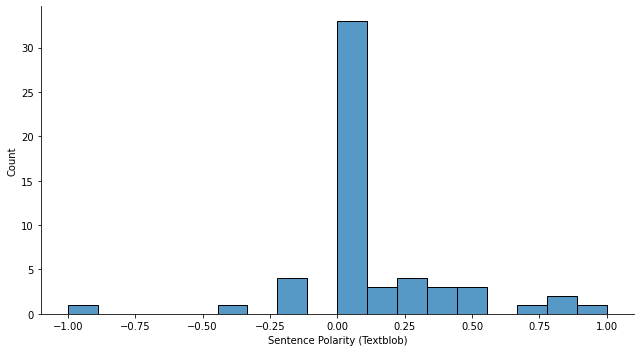

In [179]:
sns.displot(df_textblob["Polarity"], height= 5, aspect=1.8)
plt.xlabel("Sentence Polarity (Textblob)")

Text(0.5, 6.79999999999999, 'Sentence Subjectivity (Textblob)')

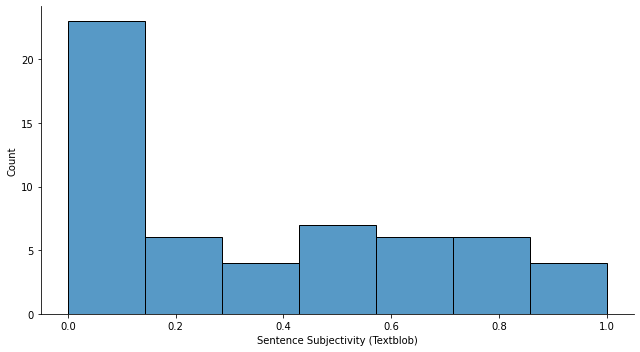

In [180]:
sns.displot(df_textblob["Subjectivity"], height= 5, aspect=1.8)
plt.xlabel("Sentence Subjectivity (Textblob)")

In [181]:
new_clean_text = re.sub(r'[^\w]', ' ', clean_text)

In [182]:
tokens = word_tokenize(new_clean_text)

In [183]:
print(tokens)

['The', 'Lionel', 'Messi', 'Story', 'How', 'Did', 'He', 'Get', 'To', 'The', 'Top', 'Of', 'The', 'World', 'Bleacher', 'Report', 'Latest', 'News', 'Videos', 'and', 'HighlightsXBleacher', 'Report', 'LogoFootballF1VideosBoxingMMARugbyNBANHLNFLAEWWWEGolfTennisGet', 'the', 'AppMoreShowsAccountSign', 'UpLoginGet', 'HelpEditionFacebook', 'LogoTwitter', 'LogoCopy', 'Link', 'IconHome', 'World', 'Football', 'FC', 'BarcelonaThe', 'Lionel', 'Messi', 'Story', 'How', 'Did', 'He', 'Get', 'To', 'The', 'Top', 'Of', 'The', 'World', 'Sriram', 'IlangoCorrespondent', 'IAugust', '16', '2009', 'CommentsComment', 'Bubble', 'IconLionel', 'Messi', 'probably', 'the', 'best', 'player', 'in', 'the', 'world', 'today', 'He', 'is', 'one', 'of', 'the', 'finest', 'and', 'most', 'exciting', 'footballing', 'talents', 'in', 'the', 'world', 'He', 'had', 'this', 'never', 'ending', 'comparison', 'with', 'the', 'former', 'Manchester', 'United', 'Winger', 'Cristiano', 'Ronaldo', 'but', 'he', 'kind', 'of', 'shrugged', 'off', 'it

In [184]:
words = []

for word in tokens:
    words.append(word.lower())

In [185]:
words[:15]

['the',
 'lionel',
 'messi',
 'story',
 'how',
 'did',
 'he',
 'get',
 'to',
 'the',
 'top',
 'of',
 'the',
 'world',
 'bleacher']

In [186]:
stopwords = nltk.corpus.stopwords.words('english')

In [187]:
words_new = []
for word in words:
    if word not in stopwords:
        words_new.append(word)

In [188]:
words_new[:200]

['lionel',
 'messi',
 'story',
 'get',
 'top',
 'world',
 'bleacher',
 'report',
 'latest',
 'news',
 'videos',
 'highlightsxbleacher',
 'report',
 'logofootballf1videosboxingmmarugbynbanhlnflaewwwegolftennisget',
 'appmoreshowsaccountsign',
 'uploginget',
 'helpeditionfacebook',
 'logotwitter',
 'logocopy',
 'link',
 'iconhome',
 'world',
 'football',
 'fc',
 'barcelonathe',
 'lionel',
 'messi',
 'story',
 'get',
 'top',
 'world',
 'sriram',
 'ilangocorrespondent',
 'iaugust',
 '16',
 '2009',
 'commentscomment',
 'bubble',
 'iconlionel',
 'messi',
 'probably',
 'best',
 'player',
 'world',
 'today',
 'one',
 'finest',
 'exciting',
 'footballing',
 'talents',
 'world',
 'never',
 'ending',
 'comparison',
 'former',
 'manchester',
 'united',
 'winger',
 'cristiano',
 'ronaldo',
 'kind',
 'shrugged',
 'helping',
 'team',
 'defeat',
 'manchester',
 'united',
 'convincingly',
 'uefa',
 'champions',
 'league',
 'finals',
 'rome',
 '2009',
 'attain',
 'place',
 'top',
 'world',
 'cloud',
 'n

In [189]:
freq_dist = nltk.FreqDist(words_new)

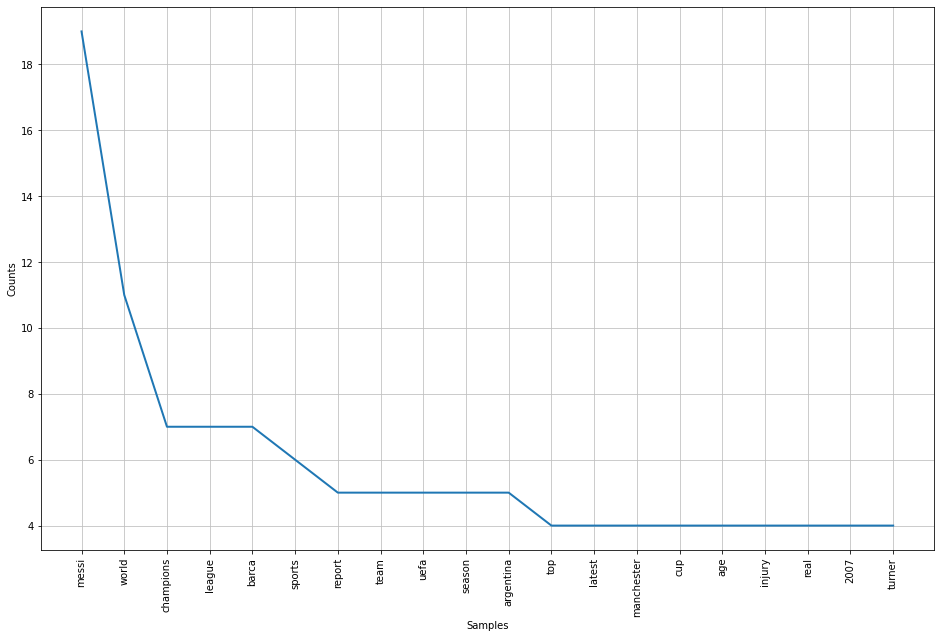

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [190]:
plt.subplots(figsize=(16,10))
freq_dist.plot(20)

In [191]:
res=' '.join([i for i in words_new if not i.isdigit()])

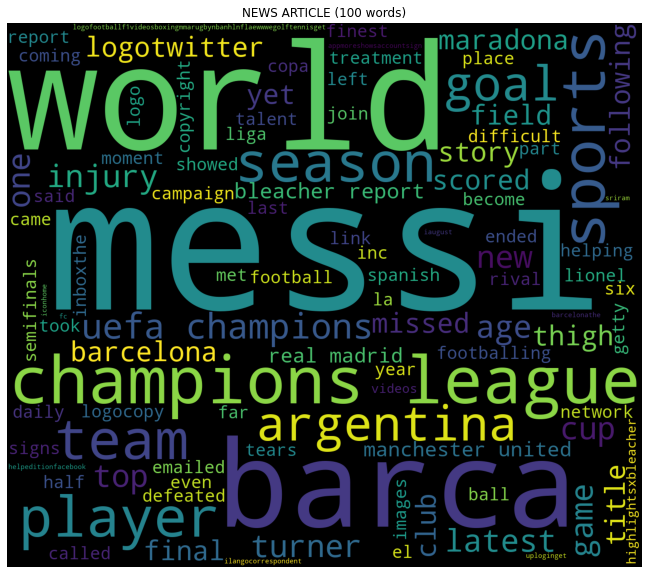

In [192]:
plt.subplots(figsize=(16,10))
wordcloud = WordCloud(
                          background_color='black',
                          max_words=100,
                          width=1400,
                          height=1200
                         ).generate(res)
plt.imshow(wordcloud)
plt.title('NEWS ARTICLE (100 words)')
plt.axis('off')
plt.show()

In [193]:
df_textblob.to_csv('article.csv', index=False)